# Topic Modelling

Provided data sets of research papers abstracts and their tags apply topic modelling technique and analyse the results.

## Library Import and Data Input

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_seq_items=2000
pd.options.display.max_rows=4000
pd.options.display.max_columns=None
from wordcloud import WordCloud, STOPWORDS

In [253]:
df_train=pd.read_csv('train.csv')
df_tags = pd.read_csv('tags.csv')
df_test = pd.read_csv('test.csv')

In [254]:
cols=df_train.columns
label_cols_train = list(cols[2:])
df_train['one_hot_labels'] = list(df_train[label_cols_train].values)

In [255]:
df_train1=df_train[['ABSTRACT','one_hot_labels']]

In [256]:
cols=df_test.columns
label_cols = list(cols[2:])
for col in label_cols_train:
    if col not in label_cols:
        df_test[col]=0
df_test['one_hot_labels'] = list(df_test[label_cols_train].values)
df_test1=df_test[['ABSTRACT','one_hot_labels']]

In [258]:
df_test.columns

Index(['id', 'ABSTRACT', 'Computer Science', 'Mathematics', 'Physics',
       'Statistics', 'Analysis of PDEs', 'Applications',
       'Artificial Intelligence', 'Astrophysics of Galaxies',
       'Computation and Language', 'Computer Vision and Pattern Recognition',
       'Cosmology and Nongalactic Astrophysics',
       'Data Structures and Algorithms', 'Differential Geometry',
       'Earth and Planetary Astrophysics', 'Fluid Dynamics',
       'Information Theory', 'Instrumentation and Methods for Astrophysics',
       'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
       'Optimization and Control', 'Representation Theory', 'Robotics',
       'Social and Information Networks', 'Statistics Theory',
       'Strongly Correlated Electrons', 'Superconductivity',
       'Systems and Control', 'one_hot_labels'],
      dtype='object')

In [259]:
#make a HuggingFace dataset
from datasets import Dataset, DatasetDict
datasets_train_test = DatasetDict({
    "train": Dataset.from_pandas(df_train1),
    "test": Dataset.from_pandas(df_test1)
    })

In [260]:
datasets_train_test

DatasetDict({
    train: Dataset({
        features: ['ABSTRACT', 'one_hot_labels'],
        num_rows: 14004
    })
    test: Dataset({
        features: ['ABSTRACT', 'one_hot_labels'],
        num_rows: 6002
    })
})

In [3]:
df_train.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [49]:
df_tags

,Tags
0,Analysis of PDEs
1,Applications
2,Artificial Intelligence
3,Astrophysics of Galaxies
4,Computation and Language
5,Computer Vision and Pattern Recognition
6,Cosmology and Nongalactic Astrophysics
7,Data Structures and Algorithms
8,Differential Geometry
9,Earth and Planetary Astrophysics


In [77]:
tag_freq = pd.DataFrame()
for tag in df_tags['Tags'].values:
   
    df_tags.loc[df_tags['Tags']==tag,'freq']=df_train[tag].sum()
    
    

In [78]:
df_tags.head()

,Tags,freq
0,Analysis of PDEs,607.0
1,Applications,592.0
2,Artificial Intelligence,1376.0
3,Astrophysics of Galaxies,574.0
4,Computation and Language,645.0


In [101]:
transpose=df_tags.transpose()
pivot1 = df_tags.pivot_table( columns='Tags', values='freq').reset_index()


In [109]:
pivot1

Tags,index,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,freq,607.0,592.0,1376.0,574.0,645.0,939.0,633.0,496.0,555.0,504.0,364.0,353.0,490.0,3825.0,775.0,574.0,398.0,621.0,366.0,954.0,619.0,531.0,893.0,542.0,566.0


In [112]:
pivot1 =pivot1.drop('index', axis=1)

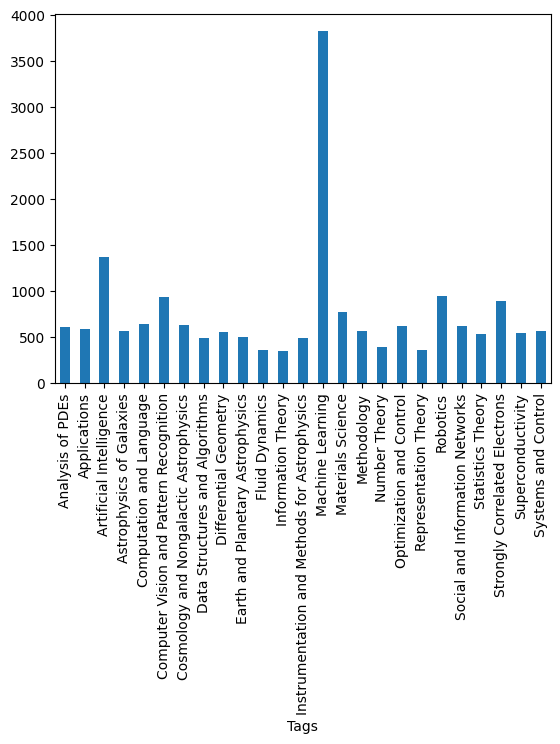

In [113]:
row = pivot1.iloc[0]

row.plot(kind='bar')
plt.show()

## Training a text classifier: tarnsformers as feature extractors

In [138]:
df_train.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [139]:
cols = df_train.columns
label_cols = list(cols[2:])
num_labels = len(label_cols)
print('Label columns: ', label_cols)

Label columns:  ['Computer Science', 'Mathematics', 'Physics', 'Statistics', 'Analysis of PDEs', 'Applications', 'Artificial Intelligence', 'Astrophysics of Galaxies', 'Computation and Language', 'Computer Vision and Pattern Recognition', 'Cosmology and Nongalactic Astrophysics', 'Data Structures and Algorithms', 'Differential Geometry', 'Earth and Planetary Astrophysics', 'Fluid Dynamics', 'Information Theory', 'Instrumentation and Methods for Astrophysics', 'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory', 'Optimization and Control', 'Representation Theory', 'Robotics', 'Social and Information Networks', 'Statistics Theory', 'Strongly Correlated Electrons', 'Superconductivity', 'Systems and Control']


In [140]:
print('Count of 1 per label: \n', df_train[label_cols].sum(), '\n') # Label counts, may need to downsample or upsample
print('Count of 0 per label: \n', df_train[label_cols].eq(0).sum())

Count of 1 per label: 
 Computer Science                                5884
Mathematics                                     2831
Physics                                         3856
Statistics                                      3794
Analysis of PDEs                                 607
Applications                                     592
Artificial Intelligence                         1376
Astrophysics of Galaxies                         574
Computation and Language                         645
Computer Vision and Pattern Recognition          939
Cosmology and Nongalactic Astrophysics           633
Data Structures and Algorithms                   496
Differential Geometry                            555
Earth and Planetary Astrophysics                 504
Fluid Dynamics                                   364
Information Theory                               353
Instrumentation and Methods for Astrophysics     490
Machine Learning                                3825
Materials Science     

In [141]:
df_train['one_hot_labels'] = list(df_train[label_cols].values)
df_train.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control,one_hot_labels
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."


## Multi Label Classification

In [261]:
# hide_output
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

C:\Users\a.poghosyan\AppData\Local\Continuum\Anaconda3\envs\nlp_test\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [262]:
def tokenize(batch):
    return tokenizer(batch["ABSTRACT"], padding=True, truncation=True)

In [263]:
abstract_df = datasets_train_test
# hide_output
abstract_encoded = abstract_df.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/14004 [00:00<?, ? examples/s]

Map:   0%|          | 0/6002 [00:00<?, ? examples/s]

In [264]:
abstract_encoded

DatasetDict({
    train: Dataset({
        features: ['ABSTRACT', 'one_hot_labels', 'input_ids', 'attention_mask'],
        num_rows: 14004
    })
    test: Dataset({
        features: ['ABSTRACT', 'one_hot_labels', 'input_ids', 'attention_mask'],
        num_rows: 6002
    })
})

In [265]:
# hide_output
import torch
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [266]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    print("aaa")
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [267]:
#abstract_encoded1= abstract_encoded.select(range(1000)) 
abstract_encoded.set_format("torch")
abstract_encoded = (abstract_encoded
          .map(lambda x : {"float_labels": x["one_hot_labels"].to(torch.float)}, remove_columns=["one_hot_labels"])
          .rename_column("float_labels", "one_hot_labels"))    

Map:   0%|          | 0/14004 [00:00<?, ? examples/s]

Map:   0%|          | 0/6002 [00:00<?, ? examples/s]

In [229]:
abstract_encoded

DatasetDict({
    train: Dataset({
        features: ['ABSTRACT', 'input_ids', 'attention_mask', 'one_hot_labels'],
        num_rows: 14004
    })
    test: Dataset({
        features: ['ABSTRACT', 'input_ids', 'attention_mask', 'one_hot_labels'],
        num_rows: 6002
    })
})

In [268]:
#hide_output
abstract_encoded['train']=abstract_encoded['train'].select(range(100))
abstract_encoded['test']=abstract_encoded['test'].select(range(60))
abstract_hidden = abstract_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

aaa


Map:   0%|          | 0/60 [00:00<?, ? examples/s]

aaa


In [269]:
abstract_hidden.column_names

{'train': ['ABSTRACT',
  'input_ids',
  'attention_mask',
  'one_hot_labels',
  'hidden_state'],
 'test': ['ABSTRACT',
  'input_ids',
  'attention_mask',
  'one_hot_labels',
  'hidden_state']}

### creating a feature matrix

In [270]:
import numpy as np

X_train = np.array(abstract_hidden["train"]["hidden_state"])
X_valid = np.array(abstract_hidden["test"]["hidden_state"])
y_train = np.array(abstract_hidden["train"]["one_hot_labels"])
y_valid = np.array(abstract_hidden["test"]["one_hot_labels"])
X_train.shape, X_valid.shape, y_train.shape

((100, 768), (60, 768), (100, 29))

In [271]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]], dtype=float32)

In [272]:

#hide_output
# We increase `max_iter` to guarantee convergence 
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import ElasticNet

# Create and train the multi-target regression model (ElasticNet)
multioutput_model = MultiOutputRegressor(
    ElasticNet(alpha=0.5, l1_ratio=0.5), n_jobs=5)
multioutput_model.fit(X_train, y_train)
     

MultiOutputRegressor(estimator=ElasticNet(alpha=0.5), n_jobs=5)

In [273]:
# Make predictions
multioutput_pred = multioutput_model.predict(X_valid)
multioutput_pred.shape

(60, 29)

In [274]:
y_valid.shape

(60, 29)

In [275]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculate performance metrics for multioutput model
multioutput_mse = mean_squared_error(y_valid, multioutput_pred)
multioutput_mae = mean_absolute_error(y_valid, multioutput_pred)

In [276]:
# Print the performance metrics
print("Multioutput Model - Mean Squared Error:", multioutput_mse)
print("Multioutput Model - Mean Absolute Error:", multioutput_mae)

Multioutput Model - Mean Squared Error: 0.03225862
Multioutput Model - Mean Absolute Error: 0.10210343


We will look at the text in abstract and do topic modelling analysis

## Topic Modelling

In [3]:
from sentence_transformers import SentenceTransformer
from typing import List
import numpy as np
import re
import matplotlib.pyplot as plt
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

C:\Users\a.poghosyan\AppData\Local\Continuum\Anaconda3\envs\nlp_test\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
import re
import string
import nltk

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

STOP_WORDS = stopwords.words()
STOP_WORDS.append('due')

[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


In [5]:
def preprocessing(text):
    """
    Convert to lowercase.
    Rremove URL links, special characters and punctuation.
    Tokenize and remove stop words.
    """
   
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)

   # print('ttttt')
    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [
        word for word in text_tokens if not word in STOP_WORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text

### Wordcloud of Abstracts

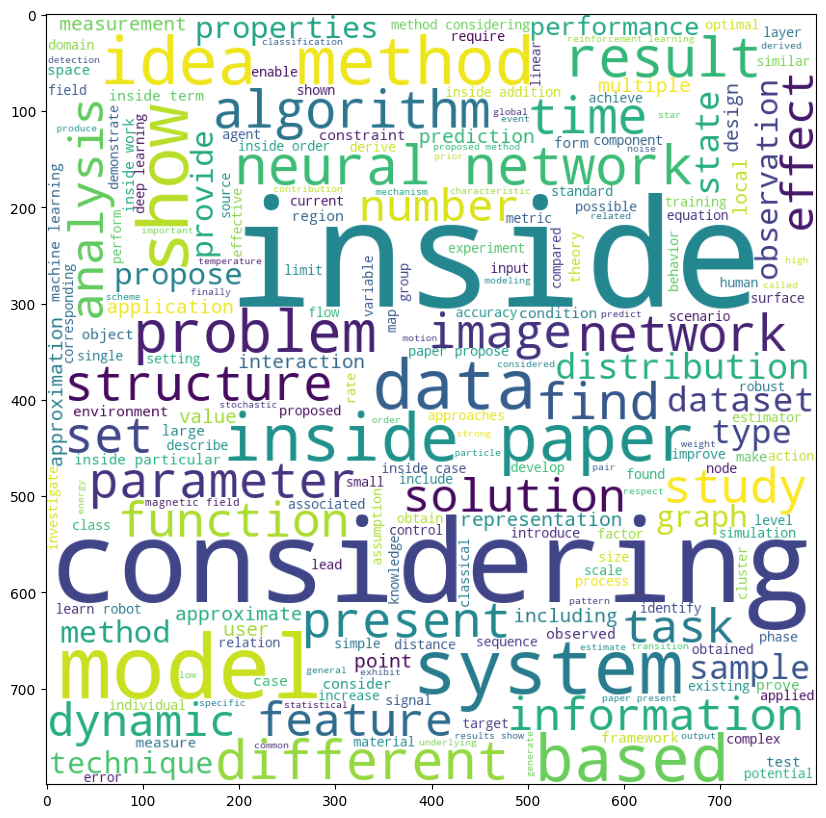

In [6]:
from wordcloud import WordCloud, STOPWORDS
filter_text = df_train['ABSTRACT'].apply(preprocessing)
# Join the different processed titles together.
long_string = ','.join(list(filter_text.values))
# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800, background_color ='white',min_font_size = 10,  max_words=5000, contour_width=3, 
contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
fig=plt.gcf()
plt.savefig('wordcloud_filtered.pdf')
plt.show()

In [7]:
MODEL = SentenceTransformer('paraphrase-MiniLM-L6-v2')
def construct_embeddings(docs: List[str]) -> np.ndarray:
    try:
        embeddings = MODEL.encode(docs)
        normalised_embeddings = embeddings / np.expand_dims(
            np.linalg.norm(embeddings, axis=1), axis=1
        )  # Normalised vectors
        return normalised_embeddings

    except (np.AxisError, TypeError) as e:
        logging.error(e)
        # There is no data in the docs list so return none
        return [None] * len(docs)

C:\Users\a.poghosyan\AppData\Local\Continuum\Anaconda3\envs\nlp_test\lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [8]:
embeddings= construct_embeddings(filter_text)

In [9]:
embeddings1 = MODEL.encode(filter_text)

In [10]:
embeddings1.shape

(14004, 384)

## Dimensionality Reduction using UMAP

C:\Users\a.poghosyan\AppData\Local\Continuum\Anaconda3\envs\nlp_test\lib\site-packages\umap\plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

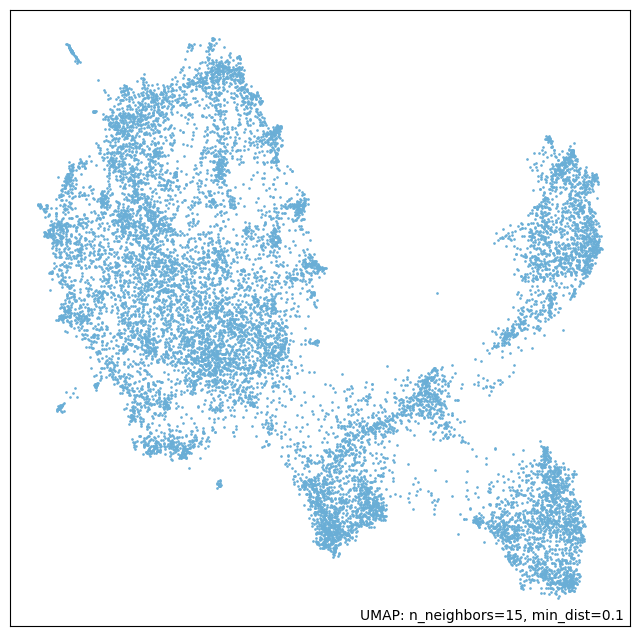

In [14]:
import umap
import umap.plot
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from umap import umap_ as UMAP
mapper = UMAP.UMAP().fit(embeddings1)
umap.plot.points(mapper)

  0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\a.poghosyan\AppData\Local\Continuum\Anaconda3\envs\nlp_test\lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
C:\Users\a.poghosyan\AppData\Local\Continuum\Anaconda3\envs\nlp_test\lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
C:\Users\a.poghosyan\AppData\Local\Continuum\Anaconda3\envs\nlp_test\lib\site-packages\umap\spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
C:\Users\a.po

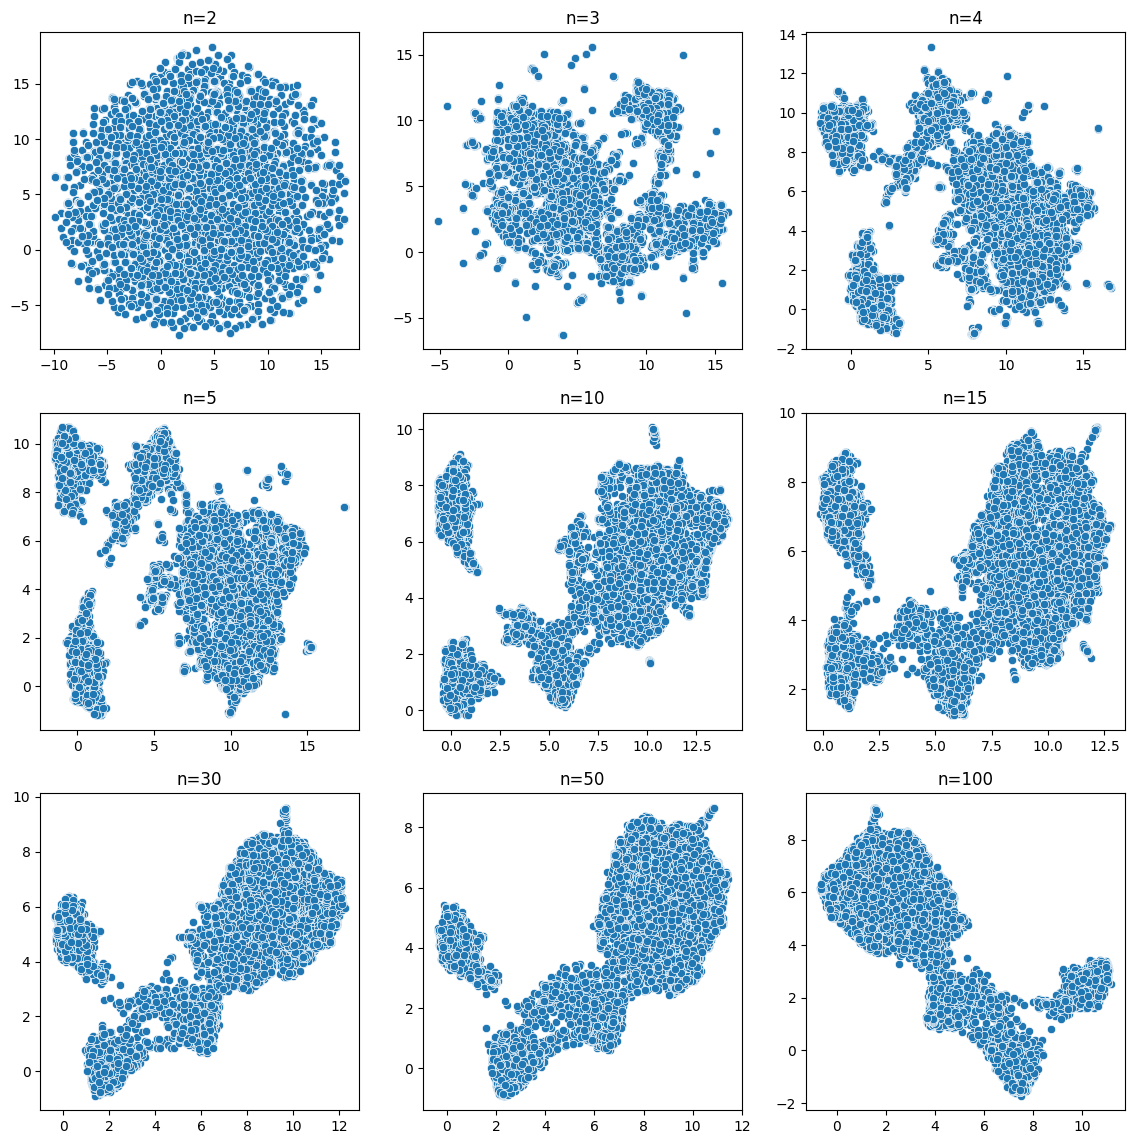

In [16]:
fig, ax = plt.subplots(3, 3, figsize=(14, 14))
nns = [2, 3, 4, 5, 10, 15, 30, 50, 100]
i, j = 0, 0
for n_neighbors in tqdm(nns):
    fit = UMAP.UMAP(n_neighbors=n_neighbors, metric='cosine')
    u = fit.fit_transform(embeddings1)
    sns.scatterplot(x=u[:,0], y=u[:,1], ax=ax[j, i])
    ax[j, i].set_title(f'n={n_neighbors}')
    if i < 2: i += 1
    else: i = 0; j += 1

In [18]:
umap_embeddings = UMAP.UMAP(n_neighbors=15, 
                            n_components=2, 
                            metric='cosine').fit_transform(embeddings1)

## Cluster Embeddings using HDBSCAN

In [20]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

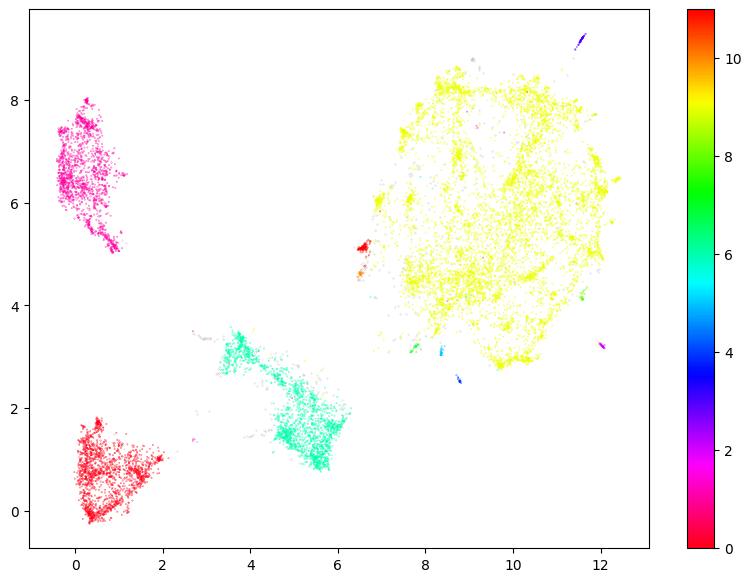

In [21]:
# Prepare data
umap_data = UMAP.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings1)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(10, 7))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [47]:
df_train['Topic'] = cluster.labels_

In [48]:
df_train['Topic'].nunique()

13

## Topic Visualization

In [26]:
docs_per_topic = df_train.groupby(['Topic'])['ABSTRACT'].apply(lambda x: ' '.join(str(v) for v in x)).reset_index()

In [28]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.ABSTRACT.values, m=len(df_train['ABSTRACT'].values))

In [34]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .ABSTRACT
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "ABSTRACT": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

In [35]:
top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(df_train); topic_sizes.head(10)

,Topic,Size
10,9,7844
7,6,1980
1,0,1759
2,1,1678
0,-1,372
12,11,113
4,3,72
3,2,54
6,5,31
9,8,29


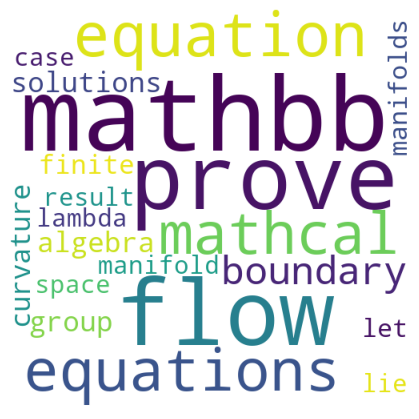

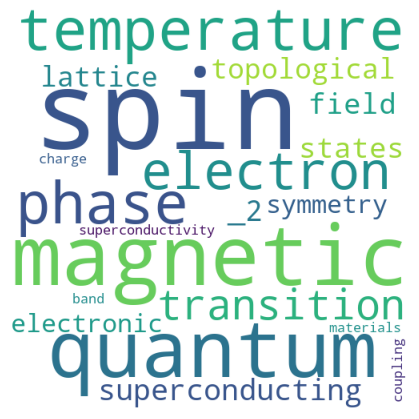

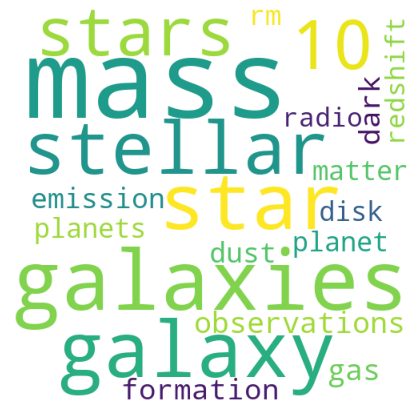

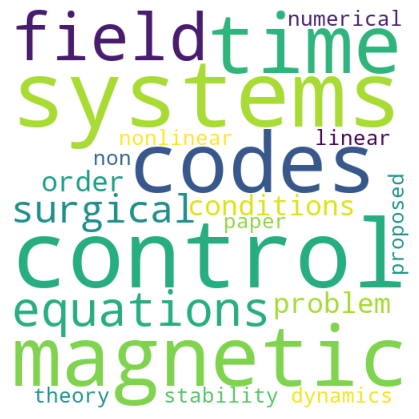

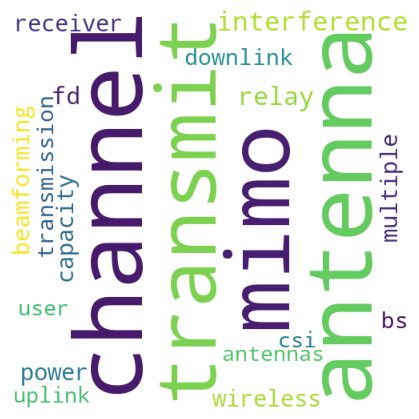

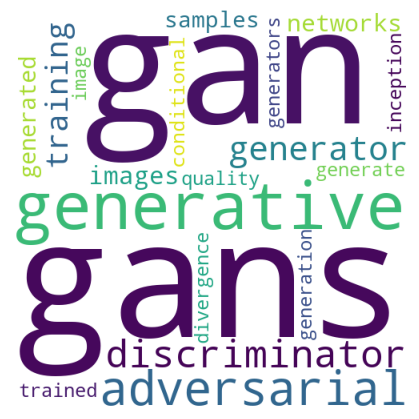

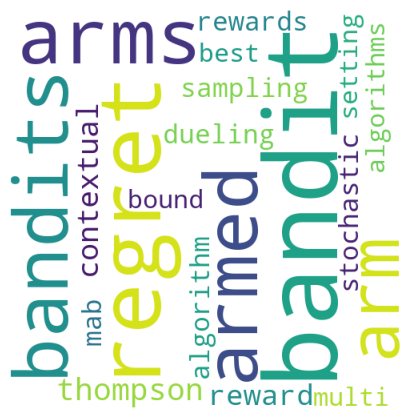

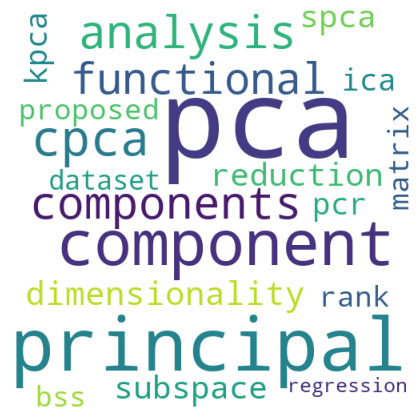

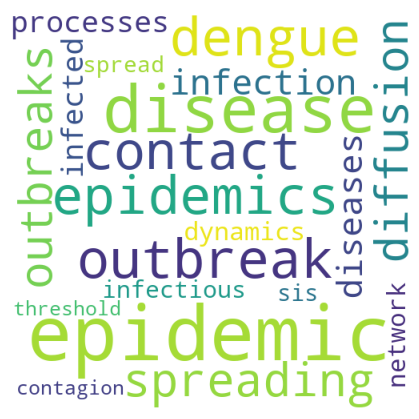

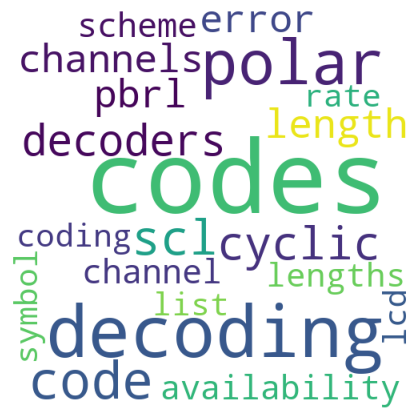

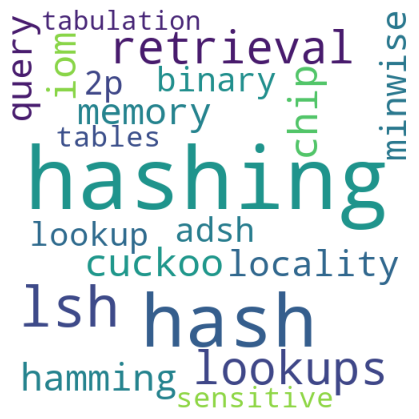

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 500, height = 500, background_color ='white',min_font_size = 10)
for i in topic_sizes['Topic'].values[1:12]:
    wordcloud.generate_from_frequencies(frequencies=dict(top_n_words[i]))
    # plot the WordCloud image               
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

## Refine Topics

In [44]:
from sklearn.metrics.pairwise import cosine_similarity
for i in range(20):
    # Calculate cosine similarity
    similarities = cosine_similarity(tf_idf.T)
    np.fill_diagonal(similarities, 0)

    # Extract label to merge into and from where
    topic_sizes = df_train.groupby(['Topic']).count().sort_values(by='ABSTRACT',ascending=False).reset_index()
    topic_to_merge = topic_sizes.iloc[-1].Topic
    topic_to_merge_into = np.argmax(similarities[topic_to_merge + 1]) - 1

    # Adjust topics
    df_train.loc[df_train.Topic == topic_to_merge, "Topic"] = topic_to_merge_into
    old_topics = df_train.sort_values("Topic").Topic.unique()
    map_topics = {old_topic: index - 1 for index, old_topic in enumerate(old_topics)}
    df_train.Topic = df_train.Topic.map(map_topics)
    docs_per_topic = df_train.groupby(['Topic'], as_index = False)['ABSTRACT'].apply(lambda x: ' '.join(str(v) for v in x))

    # Calculate new topic words
    m = len(df_train['ABSTRACT'].values)
    tf_idf, count = c_tf_idf(docs_per_topic.ABSTRACT.values, m)
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)

topic_sizes = extract_topic_sizes(df_train); topic_sizes.head(10)

,Topic,Size
0,-1,14004


In [46]:
df_train.Topic.nunique()

1